In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal
from PIL import Image
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, array_to_img

In [ ]:
def preprocess(arr):
    arr=np.asarray(arr,dtype="float32")
    arr2=arr/255
    return arr2

def denoise_image(inp):
    bg = signal.medfilt2d(inp, 11)
    mask = inp < bg - 0.1
    return np.where(mask, inp, 1.0)

In [ ]:
x_data = []
y_data = []

def loadmydata():
    for item in os.listdir('/content/drive/MyDrive/Explomy/Final_data/x_test'):

        os.chdir('/content/drive/MyDrive/Explomy/Final_data/x_test')
        img = load_img(item)
        arr = img_to_array(img)
        x_data.append(arr)

        os.chdir('/content/drive/MyDrive/Explomy/Final_data/y_test')
        img = load_img(item)
        arr = img_to_array(img)
        y_data.append(arr)  

loadmydata()

In [ ]:
x_data = tf.image.rgb_to_grayscale(x_data)
y_data = tf.image.rgb_to_grayscale(y_data)

In [ ]:
x_data1 = preprocess(x_data)
y_data1 = preprocess(y_data)

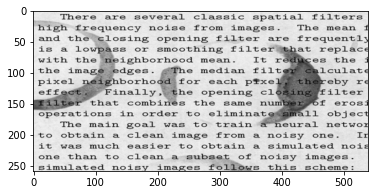

In [ ]:
plt.imshow(x_data[6,:,:,0], cmap='gray')

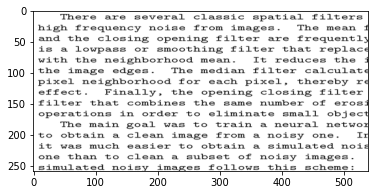

In [ ]:
plt.imshow(y_data[6,:,:,0], cmap='gray')

In [ ]:
from sklearn.metrics import mean_squared_error
rms=0

x_t = np.squeeze(x_data1)
y_t = np.squeeze(y_data1)

for i in range(len(x_data1)):
    arr = x_t[i] 
    # plt.figure(figsize=(100,100))
    # plt.subplot(10,10,1)
    # plt.axis("off")
    # plt.imshow(arr, cmap='gray')
    arr1 = denoise_image(arr)

    # plt.subplot(10,10,2)
    # plt.axis("off")
    # plt.imshow(arr1, cmap='gray')

    rms += mean_squared_error(y_t[i], arr1, squared=False)

rms/=len(x_data)
rms

0.05197435446704427